In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# Wczytanie danych
dane = pd.read_csv('dane.csv', parse_dates=['DATE'], index_col='DATE')
dane.columns = ['wartosci']

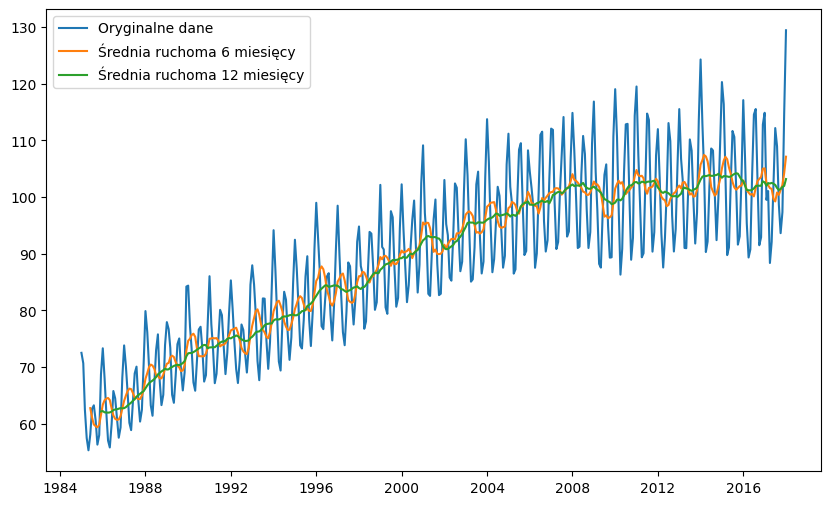

In [3]:
# 1. Średnie ruchome
dane['srednia_6'] = dane['wartosci'].rolling(window=6).mean()
dane['srednia_12'] = dane['wartosci'].rolling(window=12).mean()

plt.figure(figsize=(10, 6))
plt.plot(dane['wartosci'], label='Oryginalne dane')
plt.plot(dane['srednia_6'], label='Średnia ruchoma 6 miesięcy')
plt.plot(dane['srednia_12'], label='Średnia ruchoma 12 miesięcy')
plt.legend()
plt.show()

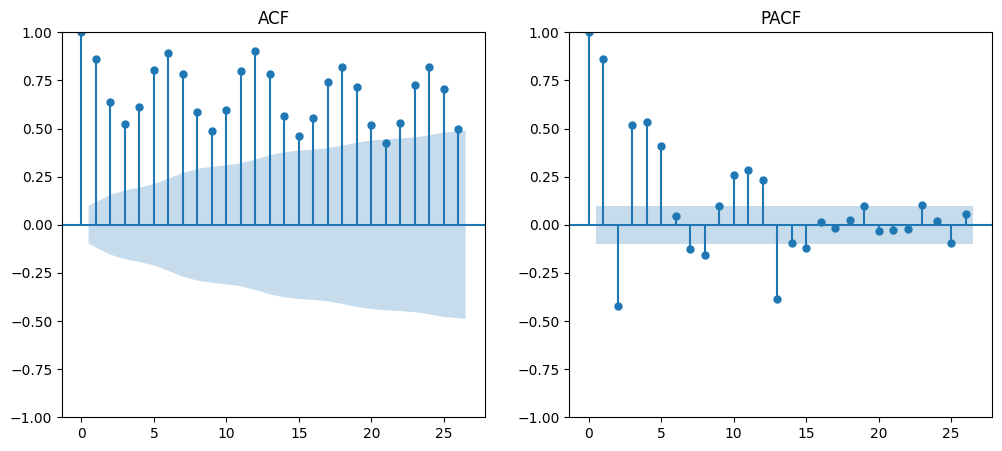

In [4]:
# 2. Analiza ACF i PACF
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(dane['wartosci'].dropna(), ax=plt.gca())
plt.title('ACF')

plt.subplot(1, 2, 2)
plot_pacf(dane['wartosci'].dropna(), ax=plt.gca(), method='ywm')
plt.title('PACF')
plt.show()

<Figure size 1000x800 with 0 Axes>

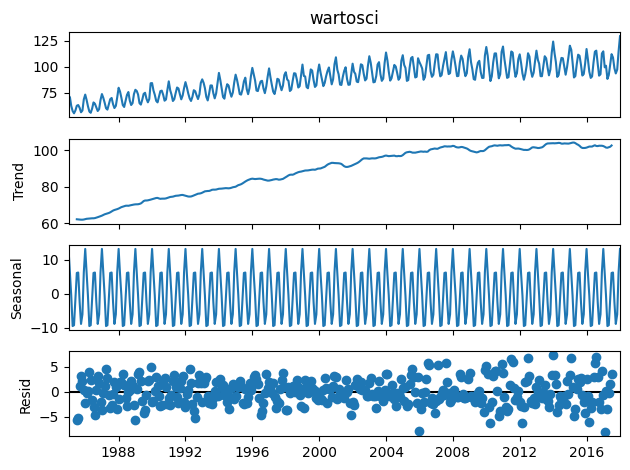

In [5]:
# 3. Dekompozycja danych
dekompozycja = seasonal_decompose(dane['wartosci'], model='additive', period=12)

plt.figure(figsize=(10, 8))
dekompozycja.plot()
plt.show()